# Advent of Code - 2024 - Day 14 - Problem 2

https://adventofcode.com/2024/day/14

## Load Source Data

Load the map data into `DATA`.

In [1]:
f = open("data/day14.txt", "r")
DATA = list(map(str.strip, f.readlines()))
f.close()

LOBBY_WIDTH = 101
LOBBY_HEIGHT = 103
MOVE_COUNT = 100

QUADRANT_WIDTH = LOBBY_WIDTH // 2
QUADRANT_HEIGHT = LOBBY_HEIGHT // 2

## Create Robot Class

In [2]:
import re

ROBOT_REGEX = re.compile("p=(\d+),(\d+) v=(-?\d+),(-?\d+)")


class Robot:

    def __init__(self, text):

        matches = ROBOT_REGEX.match(text)
        self._p_x = int(matches.group(1))
        self._p_y = int(matches.group(2))
        self._v_x = int(matches.group(3))
        self._v_y = int(matches.group(4))

    def __str__(self):
        return f"(p_x={self._p_x}, p_y={self._p_y}, v_x={self._v_x}, v_y = {self._v_y})"

    def move(self, count):
        self._p_x = (self._p_x + self._v_x * count) % LOBBY_WIDTH
        self._p_y = (self._p_y + self._v_y * count) % LOBBY_HEIGHT

    def get_quadrant(self):
        if 0 <= self._p_x < QUADRANT_WIDTH:
            if 0 <= self._p_y < QUADRANT_HEIGHT:
                return 0
            elif self._p_y > QUADRANT_HEIGHT:
                return 1
            else:
                return -1
        elif self._p_x > QUADRANT_WIDTH:
            if 0 <= self._p_y < QUADRANT_HEIGHT:
                return 2
            elif self._p_y > QUADRANT_HEIGHT:
                return 3
            else:
                return -1
        else:
            return -1

## Create Robots

Also, define `TOTAL_MOVES` so that we can re-run the next cell as required.

In [3]:
ROBOTS = list()
for line in DATA:
    ROBOTS.append(Robot(line))

TOTAL_MOVES = 0

## Move Robots



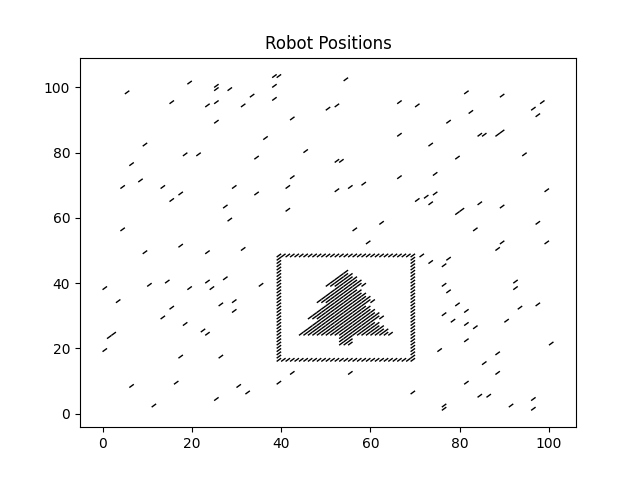

TOTAL_MOVES = 7709


In [4]:
%matplotlib widget

import matplotlib.pyplot as plt
import itertools

from matplotlib.patches import PathPatch
from matplotlib.path import Path


fig, axis = plt.subplots()


# Detect if our robots have formed both a vertical and horizontal line somewhere on the grid.
#
def matches_pattern():

    x_list = list()
    y_list= list()
    for r in ROBOTS:
        x_list.append(r._p_x)
        y_list.append(r._p_y)

    max_x_count = max([len(list(x_iter)) for x, x_iter in itertools.groupby(sorted(x_list))])
    max_y_count = max([len(list(y_iter)) for x, y_iter in itertools.groupby(sorted(y_list))])

    return max_x_count >= 30 and max_y_count >= 30


# Move the robots until a potential pattern has been found.
#
while True:
    TOTAL_MOVES += 1
    for robot in ROBOTS:
        robot.move(1)

    if matches_pattern():
        break

for robot in ROBOTS:

    x = robot._p_x
    y = LOBBY_HEIGHT - robot._p_y
    vertices = [(x, y), (x + 1, y + 1)]
    codes = [Path.MOVETO] + [Path.LINETO]

    path = Path(vertices, codes)
    pathpatch = PathPatch(path, facecolor="none", edgecolor="black")
    axis.add_patch(pathpatch)

axis.set_title("Robot Positions")

axis.autoscale_view()

plt.show()

print(f"TOTAL_MOVES = {TOTAL_MOVES}")
